In [4]:
#IMPORT from internet and download into your path
import os,urllib.request


# PROVIDE YOUR DOWNLOAD DIRECTORY HERE
datapath = '../../Data/MNIST/'  

# CREATING DOWNLOAD DIRECTORY
if not os.path.exists(datapath):
    os.makedirs(datapath)

# URLS TO DOWNLOAD FROM
urls = ['http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz',
       'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz']

for url in urls:
    filename = url.split('/')[-1]   # GET FILENAME
    
    if os.path.exists(datapath+filename):
        print(filename, ' already exists')  # CHECK IF FILE EXISTS
    else:
        print('Downloading ',filename)
        urllib.request.urlretrieve (url, datapath+filename) # DOWNLOAD FILE
     
print('All files are available')

train-images-idx3-ubyte.gz  already exists
train-labels-idx1-ubyte.gz  already exists
All files are available


## Extracting the downloaded files

The downloaded files are in an archive format and needs to be extracted. It can be manually extracted using the GUI or the code segment below can also be used.

In [5]:
import os,gzip,shutil

# PROVIDE YOUR DOWNLOAD DIRECTORY HERE
datapath = '../../Data/MNIST/'  #replace data and MNIST with your file name

# LISTING ALL ARCHIVES IN THE DIRECTORY
files = os.listdir(datapath)
for file in files:
    if file.endswith('gz'):
        print('Extracting ',file)
        with gzip.open(datapath+file, 'rb') as f_in:
            with open(datapath+file.split('.')[0], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
print('Extraction Complete')

# OPTIONAL REMOVE THE ARCHIVES
#for file in files:
  #  print('Removing ',file)
  #  os.remove(datapath+file)
#print ('All archives removed')

Extracting  t10k-images-idx3-ubyte.gz
Extracting  t10k-labels-idx1-ubyte.gz
Extracting  train-images-idx3-ubyte.gz
Extracting  train-labels-idx1-ubyte.gz
Extraction Complete


In [237]:
import os,codecs,numpy

# PROVIDE YOUR DIRECTORY WITH THE EXTRACTED FILES HERE
datapath = "../../Data/MNIST/"

files = os.listdir(datapath)

def get_int(b):   # CONVERTS 4 BYTES TO A INT
    return int(codecs.encode(b, 'hex'), 16)

data_dict = {}
for file in files:
    if file.endswith('ubyte'):  # FOR ALL 'ubyte' FILES
        print('Reading ',file)
        with open (datapath+file,'rb') as f:
            data = f.read()
            type = get_int(data[:4])   # 0-3: THE MAGIC NUMBER TO WHETHER IMAGE OR LABEL
            length = get_int(data[4:8])  # 4-7: LENGTH OF THE ARRAY  (DIMENSION 0)
            if (type == 2051):
                category = 'images'
                num_rows = get_int(data[8:12])  # NUMBER OF ROWS  (DIMENSION 1)
                num_cols = get_int(data[12:16])  # NUMBER OF COLUMNS  (DIMENSION 2)
                parsed = numpy.frombuffer(data,dtype = numpy.uint8, offset = 16)  # READ THE PIXEL VALUES AS INTEGERS
                parsed = parsed.reshape(length,num_rows,num_cols)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES x HEIGHT x WIDTH]           
            elif(type == 2049):
                category = 'labels'
                parsed = numpy.frombuffer(data, dtype=numpy.uint8, offset=8) # READ THE LABEL VALUES AS INTEGERS
                parsed = parsed.reshape(length)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES]                           
            if (length==10000):
                set = 'test'
            elif (length==60000):
                set = 'train'
            data_dict[set+'_'+category] = parsed  # SAVE THE NUMPY ARRAY TO A CORRESPONDING KEY     

Reading  t10k-images-idx3-ubyte
Reading  t10k-labels-idx1-ubyte
Reading  train-images-idx3-ubyte
Reading  train-labels-idx1-ubyte


### Saving images from the dataset

This code segment can be used to save the data of the numpy array as images in class specific directories.

(<matplotlib.image.AxesImage at 0x177868a94e0>, 6)

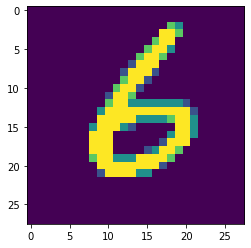

In [238]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(data_dict['train_images'][66]),data_dict['train_labels'][66]

##question 1 PCA

In [239]:
data =data_dict['train_images']
label = data_dict['train_labels']
train_labels= np.where((label==2)|(label==3)|(label==5))
x_train,y_train=data[train_labels],label[train_labels] # split into the training datax and labels y
nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))

In [240]:
print(x_train.shape)
print(y_train.shape)

(17510, 784)
(17510,)


In [241]:
import numpy as np
covariance=np.cov(x_train.T)


In [242]:
from numpy.linalg import eigh
values, vectors = eigh(covariance)
print(values[-10:])
print(vectors.shape)

[ 77686.66382933  88651.01798029  95315.34706162 107719.2217799
 130924.43974759 145189.84885147 180411.41252995 226664.89127846
 273143.65408274 397784.40905695]
(784, 784)


In [243]:
values_r = values[-2:]
vectors_r = vectors[:,-2:]
vectors_r = vectors_r.T
print("Shape of eigen value: ", values_r.shape)
print("Shape of eigen vectors: ", vectors_r.shape)

Shape of eigen value:  (2,)
Shape of eigen vectors:  (2, 784)


In [244]:
y = np.matmul(vectors_r,x_train.T)
print("Reduced data shape: ", y.shape)

Reduced data shape:  (2, 17510)


In [245]:
import matplotlib.pyplot as plt
import numpy as np

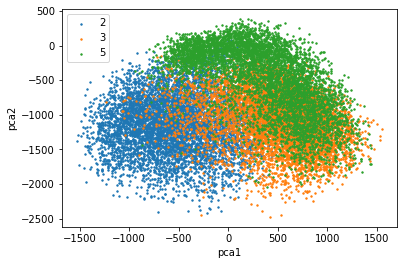

In [246]:
fig, ax = plt.subplots()
ax.scatter(-y[1][y_train==2],y[0][y_train==2], s=2, label='2')
ax.scatter(-y[1][y_train==3],y[0][y_train==3], s=2, label='3')
ax.scatter(-y[1][y_train==5],y[0][y_train==5], s=2, label='5')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend(loc='upper left')
plt.show(fig,ax)

In [247]:
x2_bar = np.matmul(vectors_r.T,y[:, y_train==2])
x3_bar = np.matmul(vectors_r.T,y[:, y_train==3])
x5_bar = np.matmul(vectors_r.T,y[:, y_train==5])
x_bar = np.matmul(vectors_r.T,y)
print(y[:, y_train==2].shape) 
#x_bar[:,y_train==2].shape

(2, 5958)


In [248]:
train2_labels= np.where((label==2))
x2_train,y2_train=data[train2_labels],label[train2_labels]
train3_labels= np.where((label==3))
x3_train,y3_train=data[train3_labels],label[train3_labels]
train5_labels= np.where((label==5))
x5_train,y5_train=data[train5_labels],label[train5_labels]
nsamples, nx, ny = x2_train.shape
x2_train = x2_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = x3_train.shape
x3_train = x3_train.reshape((nsamples,nx*ny))
nsamples, nx, ny = x5_train.shape
x5_train = x5_train.reshape((nsamples,nx*ny))
print(x2_train.shape, x3_train.shape, x5_train.shape)

(5958, 784) (6131, 784) (5421, 784)


In [249]:
def error(x,x_bar):
 for i in range(1,len(x)):
  error=0
  diff=x[i]-x_bar.T[i]
  error+= np.matmul(diff,diff)
 return error
#diff.shape

In [250]:
print(error(x5_train,x5_bar))

4108792.6238308297


In [251]:
def eigen(e):
    nvalues=values[-(e):]
    nvectors=vectors[:,-(e):]
    return (nvalues,nvectors.T)

In [252]:
values_r10,vectors_r10 = eigen(10)
values_r50,vectors_r50 = eigen(50)
values_r100,vectors_r100 = eigen(100)
values_r200,vectors_r200 = eigen(200)
values_r300,vectors_r300 = eigen(300)
print("Shape of eigen value: ", values_r300.shape)
print("Shape of eigen vectors: ", vectors_r300.shape)

Shape of eigen value:  (300,)
Shape of eigen vectors:  (300, 784)


In [253]:
y10 = np.matmul(vectors_r10,x_train.T)
y50 = np.matmul(vectors_r50,x_train.T)
y100 = np.matmul(vectors_r100,x_train.T)
y200 = np.matmul(vectors_r200,x_train.T)
y300 = np.matmul(vectors_r300,x_train.T)
print("Reduced data shape: ", y300.shape)

Reduced data shape:  (300, 17510)


In [254]:
x10_bar = np.matmul(vectors_r10.T,y10)
x50_bar = np.matmul(vectors_r50.T,y50)
x100_bar = np.matmul(vectors_r100.T,y100)
x200_bar = np.matmul(vectors_r200.T,y200)
x300_bar = np.matmul(vectors_r300.T,y300)
print(x50_bar[:, y_train==5].shape) 

(784, 5421)


In [255]:
error50=error(x2_train,x50_bar[:, y_train==2])

In [256]:
error10=error(x2_train,x10_bar[:, y_train==2])
error100=error(x2_train,x100_bar[:, y_train==2])
error200=error(x2_train,x200_bar[:, y_train==2])
error300=error(x2_train,x300_bar[:, y_train==2])

In [257]:
error2=error(x2_train,x2_bar)



In [258]:
error2_3=error(x3_train,x3_bar)
error10_3=error(x3_train,x10_bar[:, y_train==3])
error50_3=error(x3_train,x50_bar[:, y_train==3])
error100_3=error(x3_train,x100_bar[:, y_train==3])
error200_3=error(x3_train,x200_bar[:, y_train==3])
error300_3=error(x3_train,x300_bar[:, y_train==3])

In [259]:
error2_5=error(x5_train,x5_bar)
error10_5=error(x5_train,x10_bar[:, y_train==5])
error50_5=error(x5_train,x50_bar[:, y_train==5])
error100_5=error(x5_train,x100_bar[:, y_train==5])
error200_5=error(x5_train,x200_bar[:, y_train==5])
error300_5=error(x5_train,x300_bar[:, y_train==5])

In [260]:
errorf2=np.append(error2,error10)
errorf2=np.append(errorf2,error50)
errorf2=np.append(errorf2,error100)

In [261]:
errorf2=np.append(errorf2,error200)
errorf2=np.append(errorf2,error300)

In [262]:
errorsf_3=np.append(error2_3,error10_3)
errorsf_3=np.append(errorsf_3,error50_3)
errorsf_3=np.append(errorsf_3,error100_3)
errorsf_3=np.append(errorsf_3,error200_3)
errorsf_3=np.append(errorsf_3,error300_3)

In [263]:
errorsf_5=np.append(error2_5,error10_5)
errorsf_5=np.append(errorsf_5,error50_5)
errorsf_5=np.append(errorsf_5,error100_5)
errorsf_5=np.append(errorsf_5,error200_5)
errorsf_5=np.append(errorsf_5,error300_5)

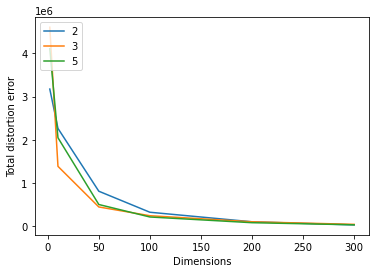

In [264]:
fig, plot = plt.subplots()
plt.plot([2,10,50,100,200,300],errorf2,label='2')
plt.plot([2,10,50,100,200,300],errorsf_3,label='3')
plt.plot([2,10,50,100,200,300],errorsf_5,label='5')
plt.xlabel('Dimensions')
plt.ylabel('Total distortion error')
plt.legend(loc='upper left')

In [265]:
class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, Xlda, ylda):
        n_features = Xlda.shape[1]
        class_labels = np.unique(ylda)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        mean_overall = np.mean(Xlda, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = Xlda[ylda == c]
            mean_c = np.mean(X_c, axis=0)
            SW += np.matmul((X_c - mean_c).T,(X_c - mean_c))
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        # Determine SW^-1 * SB
        A = np.linalg.pinv(SW).dot(SB)
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)
    

Shape of X: (17510, 784)
Shape of transformed X: (17510, 2)


C:\Users\mohammed\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


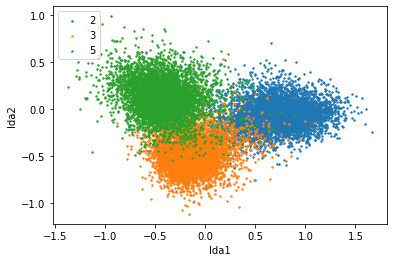

In [266]:
Xlda = x_train
ylda = y_train

# Project the data onto the 2 primary linear discriminants
lda = LDA(2)
lda.fit(Xlda, ylda)
X_projected = lda.transform(Xlda)

print('Shape of X:', Xlda.shape)
print('Shape of transformed X:', X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x1[y_train==2],x2[y_train==2], s=2, label='2')
ax.scatter(x1[y_train==3],x2[y_train==3], s=2, label='3')
ax.scatter(x1[y_train==5],x2[y_train==5], s=2, label='5')
plt.xlabel('lda1')
plt.ylabel('lda2')
plt.legend(loc='upper left')
plt.show(fig,ax)

In [55]:
>>> import numpy as np
>>> from sklearn.manifold import TSNE
>>> X = x_train
>>> X_embedded = TSNE(n_components=2).fit_transform(X)
>>> X_embedded.shape

(17510, 2)

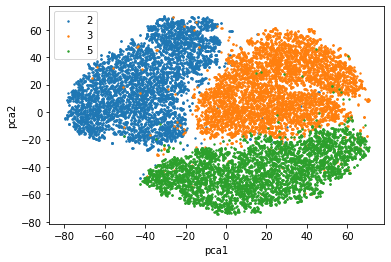

In [57]:
x1 = X_embedded[:, 0]
x2 = X_embedded[:, 1]
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x1[y_train==2],x2[y_train==2], s=2, label='2')
ax.scatter(x1[y_train==3],x2[y_train==3], s=2, label='3')
ax.scatter(x1[y_train==5],x2[y_train==5], s=2, label='5')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.legend(loc='upper left')
plt.show(fig,ax)

In [267]:
###linear regression
data1 =data_dict['train_images']
label1 = data_dict['train_labels']
train35_label= np.where((label1==3)|(label1==5))
x35_train,y35_train=data1[train35_label],label1[train35_label]
n35samples, n35x, n35y = x35_train.shape
x35_train = x35_train.reshape((n35samples,n35y*n35x))
print(x35_train.shape)
x_3train=x35_train/255

(11552, 784)


In [268]:
np.mean(x_3train/255)

0.0005315001132846812

In [269]:
def binaryclass(training):
    c = (training < 5).astype(int)
    y3_train=np.where(c!= 0, c, -1)
    return y3_train
    

In [270]:
ytrain=binaryclass(y35_train)

In [271]:
x_3train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [272]:
w = np.dot(np.dot(np.linalg.pinv(np.dot(x_3train.T, x_3train)),x_3train.T), ytrain)

In [273]:
test_data =data_dict['test_images']
test_label = data_dict['test_labels']
test35_label= np.where((test_label==3)|(test_label==5))
x35_test,y35_test=test_data[test35_label],test_label[test35_label]
n35samples, n35x, n35y = x35_test.shape
x35_test = x35_test.reshape((n35samples,n35y*n35x))
print(x35_test.shape)
x_3test=x35_test/255

(1902, 784)


In [274]:
ytest=binaryclass(y35_test)

In [275]:
yp=np.sign(np.dot(w,x_3test.T))

In [276]:
print(yp,ytrain)

[-1. -1.  1. ... -1.  1. -1.] [-1  1  1 ... -1  1 -1]


In [277]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

In [278]:
print("classification accuracy", accuracy(ytest, yp))

classification accuracy 0.9616193480546793


In [279]:
class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = self._sigmoid(linear_model)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))


In [75]:
class MCE:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            # approximate y with linear combination of weights and x, plus bias
            linear_model = np.dot(X, self.weights) + self.bias
            # apply sigmoid function
            y_predicted = np.dot(self._sigmoid(linear_model),(1-self._sigmoid(linear_model)))

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = (self._sigmoid(linear_model)*(1-self._sigmoid(linear_model)))
        y_predicted_cls = [1 if i > 0 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [113]:
#MCE 
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

c = (y35_train < 5).astype(int)
y3_test=(y35_test < 5).astype(int)
X1_train,y1_train= x35_train, c

X1_test,y1_test = x35_test,y3_test

MCEregressor = MCE(learning_rate=0.001, n_iters=784)
MCEregressor.fit(X1_train, y1_train)
predictions = MCEregressor.predict(X1_test)
print(y1_train)
print("LR classification accuracy:", accuracy(y1_test, predictions))

C:\Users\mohammed\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: overflow encountered in exp


[0 1 1 ... 0 1 0]
LR classification accuracy: 0.46898002103049424


In [115]:
#logistic regression
c = (y35_train < 5).astype(int)
y3_test=(y35_test < 5).astype(int)
X1_train,y1_train= x35_train, c

X1_test,y1_test = x35_test,y3_test

regressor = LogisticRegression(learning_rate=0.00001, n_iters=784)
regressor.fit(X1_train, y1_train)
predictions = regressor.predict(X1_test)
print(y1_train)
print("LR classification accuracy:", accuracy(y1_test, predictions))

[0 1 1 ... 0 1 0]
LR classification accuracy: 0.9631966351209253


In [731]:
#SVM

In [282]:
test_data =data_dict['test_images']
tlb = data_dict['test_labels']
test_labels= np.where((tlb==0)|(tlb==1)|(tlb==2)|(tlb==3)|(tlb==4)|(tlb==5)|(tlb==6)|(tlb==7)|(tlb==8)|(tlb==9))
test_x,test_y=test_data[test_labels],tlb[test_labels]
nsamples, nx, ny = test_x.shape
test_x = test_x.reshape((nsamples,ny*nx))
print(test_x.shape)

(10000, 784)


In [283]:
data1 =data_dict['train_images']
lb= data_dict['train_labels']
train_label= np.where((lb==0)|(lb==1)|(lb==2)|(lb==3)|(lb==4)|(lb==5)|(lb==6)|(lb==7)|(lb==8)|(lb==9))
train_x,train_y=data1[train_label],lb[train_label]
nsamples, nx, ny = train_x.shape
train_x = train_x.reshape((nsamples,ny*nx))
print(train_y.shape)


(60000,)


In [284]:
class SVM1:
    def __init__(self, c=1.0):
        self.c = c
        self.w = 0
        self.b = 0
    
    def loss(self, X, Y, w, b):
        c = self.c
        loss = 0
        for i in range(X.shape[0]):
            ti = Y[i]*(w@X[i] + b)
            loss += c*max(0,1-ti)
        loss += 0.5 * w.T@w
        return loss
            
    def fit(self, X, Y, batch_size = 100, learning_rate = 0.01, max_itr = 300):
        '''
        This function is used to train the classifier
        '''
        w = np.zeros((X.shape[1],))
        b = 0
        c = self.c
        n = learning_rate
        losses  = []
        
        indices = np.arange(X.shape[0])
        
        for i in range(max_itr):
            losses.append(self.loss(X,Y,w,b))
            np.random.shuffle(indices)
            
            #iterating each batch
            for batch_start in range(0,X.shape[0],batch_size):
                gradw = np.zeros(X.shape[1],)
                gradb = 0
                
                #iterating each example of a batch
                for j in range(batch_start,batch_start+batch_size):
                    if j<X.shape[0]:
                        ix = indices[j]
                        ti = Y[ix]*(w@X[ix] + b)

                        if ti<1:
                            gradw += c*Y[ix]*X[ix]
                            gradb += c*Y[ix]
                        
                w = w - n*w + n*gradw
                b = b + n*gradb
                
                
        self.w = w
        self.b = b
        return w, b, losses

In [285]:
def getClassWiseData(x,y):
    '''
    This function returns a dictionary of class-wise data
    '''
    data = {}
    classes = np.unique(y)
    for i in classes:
        data[i] = []
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data

In [286]:
def getBinaryClassificationData(d1,d2):
    '''
    Modifies the data labels, and returns the data that can be used for binary classification
    '''
    l1 = d1.shape[0]
    l2 = d2.shape[0]
    no_of_features = d2.shape[1]
    
    x = np.zeros((l1+l2, no_of_features),dtype='uint8')
    y = np.zeros((l1+l2,))
    
    x[:l1,:] = d1
    x[l1:,:] = d2
    
    y[:l1] = -1
    y[l1:] = +1
        
    return x,y

In [287]:
def trainSVMs(x,y):
    data=getClassWiseData(x,y)
    svm_classifiers = {}
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getBinaryClassificationData(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate=0.0001,max_itr=100)
            svm_classifiers[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            
    
    return svm_classifiers

In [288]:
#CLASSES variable is assigned the number of classes present in the training data
CLASSES = len(np.unique(train_y))
print(CLASSES)

10


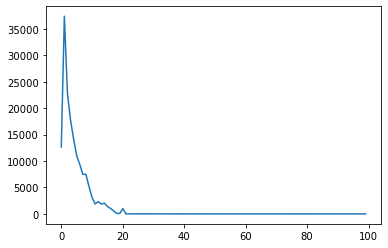

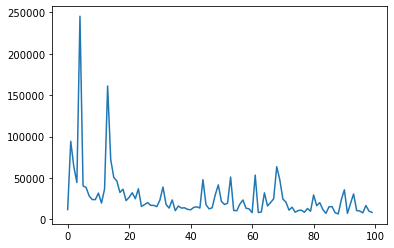

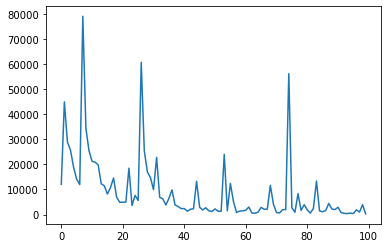

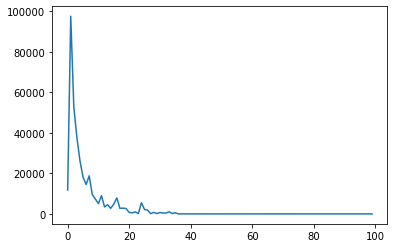

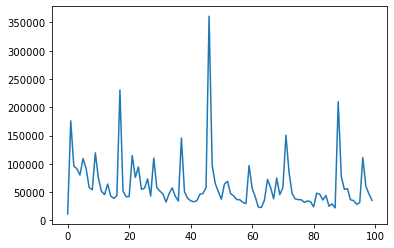

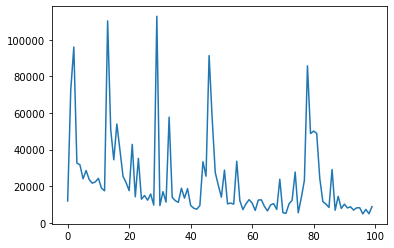

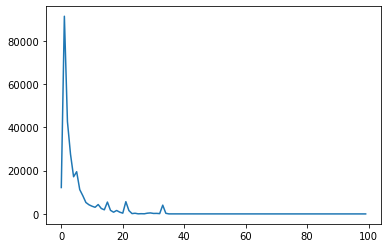

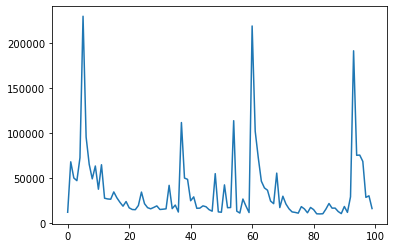

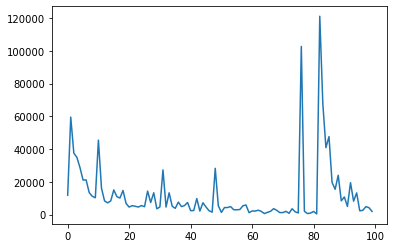

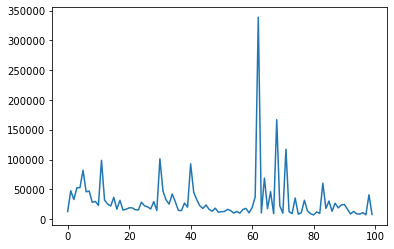

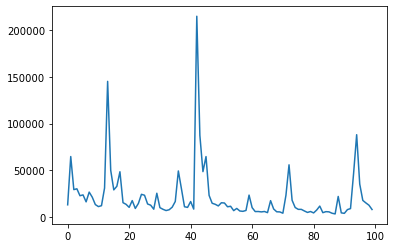

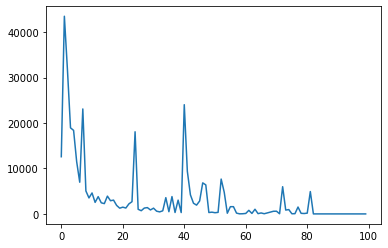

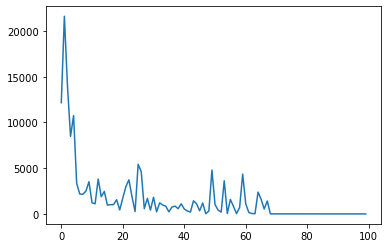

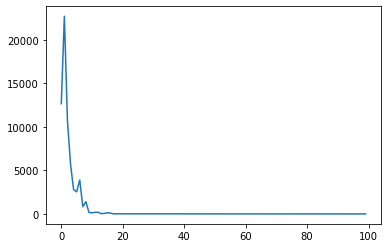

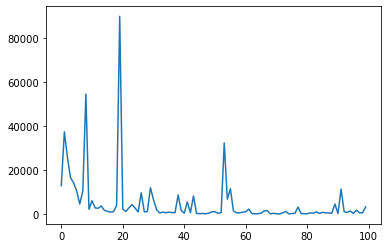

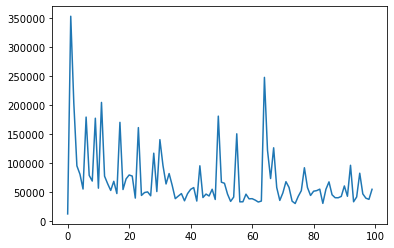

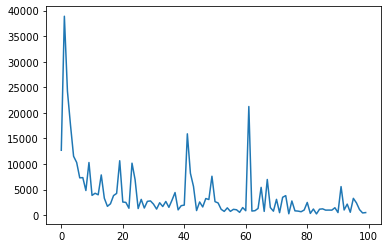

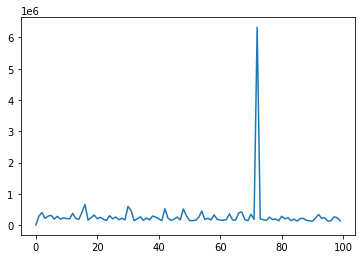

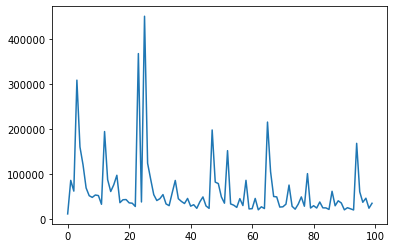

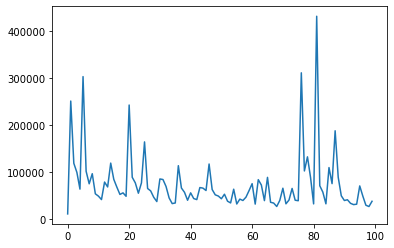

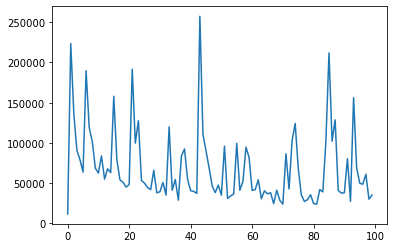

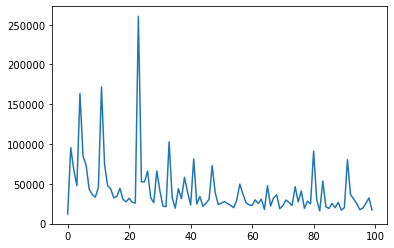

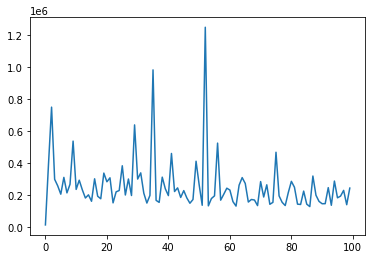

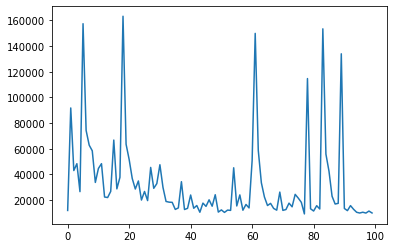

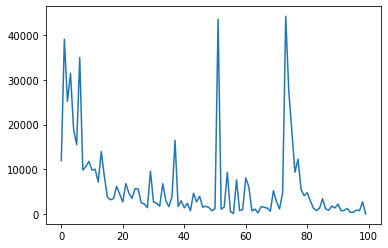

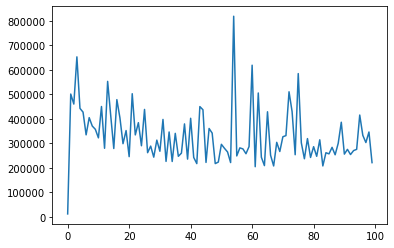

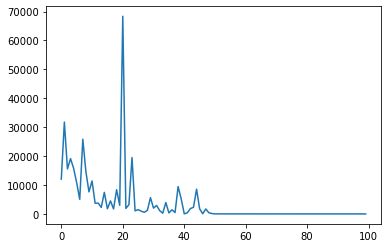

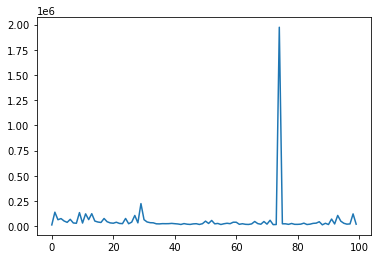

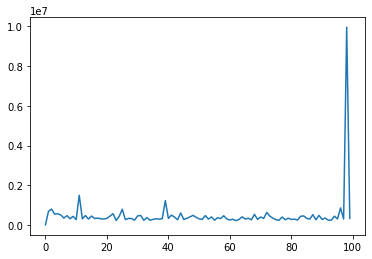

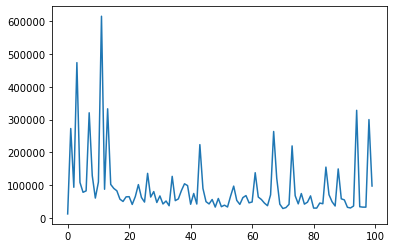

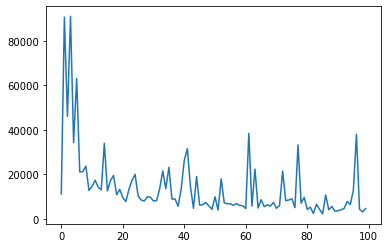

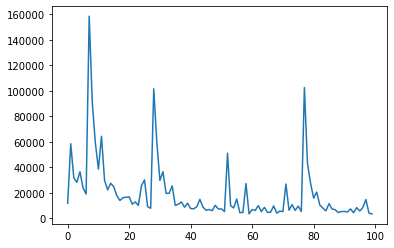

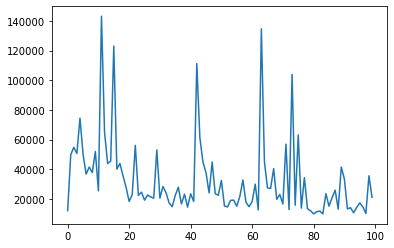

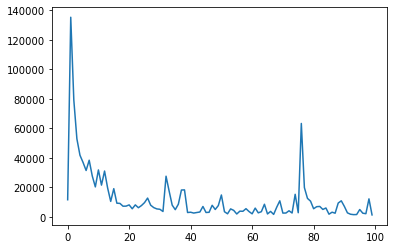

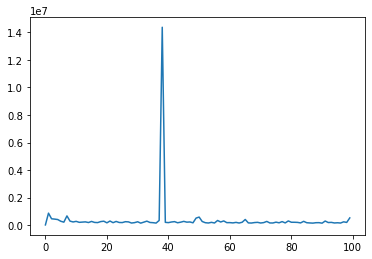

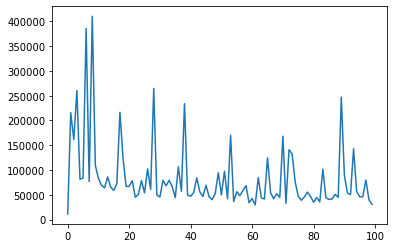

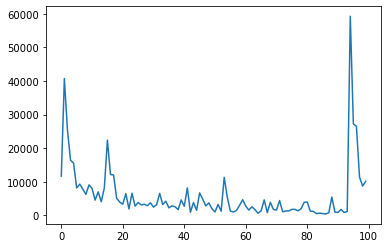

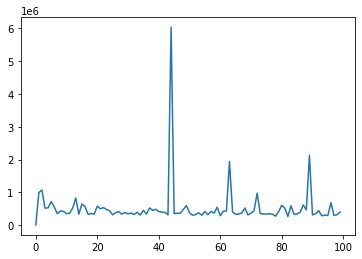

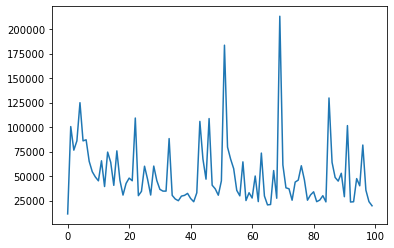

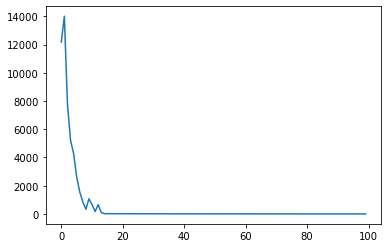

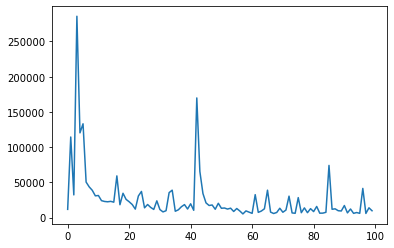

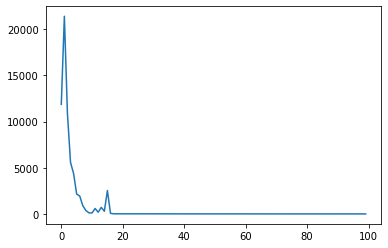

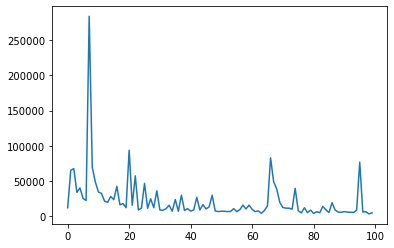

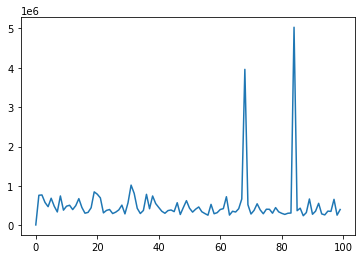

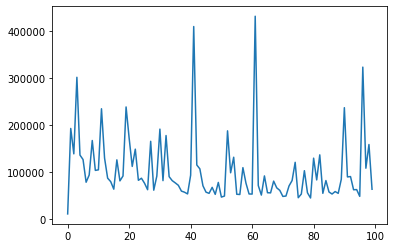

Wall time: 8min 13s


In [231]:
%%time
#initializing an object of class SVM(creted by us), and c = 1.0
#usually 9 minutes runtime
mySVM = SVM1(c=1.0)
#training NC2 classifiers
svm_classifiers = trainSVMs(train_x,train_y)

In [232]:
def binaryPredict(x,w,b):
    '''
    returns either +1 or -1, i.e., it makes a binary prediction 
    '''
    z  = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1

In [233]:
def predictsvm(x):
    '''
    calls binaryPredict function for each of the NC2 classifiers, 
    and then it does majority voting to make the final prediction.
    '''
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            #Take a majority prediction 
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
    
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction

In [234]:
print(predictsvm(train_x[9]))
print(train_y[9])

4
4


In [235]:
def accuracysvm(x,y):
    count = 0
    for i in range(x.shape[0]):
        prediction = predict(x[i])
        if(prediction==y[i]):
            count += 1
            
    return count/x.shape[0]

In [236]:
print('Training Accuracy : %.4f' %accuracysvm(train_x, train_y))
print('Testing Accuracy : %.4f' %accuracysvm(test_x,test_y))

Training Accuracy : 0.9359
Testing Accuracy : 0.9182


In [59]:
print(train_y)

[5 0 4 ... 5 6 8]


In [289]:
#question 4 DNN

In [290]:
data =data_dict['train_images']
label = data_dict['train_labels']
train_labels= np.where((label==3)|(label==5))
x_train,y_train=data[train_labels],label[train_labels]
#nsamples, nx, ny = x_train.shape
#x_train = x_train.reshape((nsamples,nx*ny))
x_train=x_train/255
x_train.shape

(11552, 28, 28)

In [291]:
import numpy as np
test =data_dict['test_images']
tlabel = data_dict['test_labels']
test_labels= np.where((tlabel==3)|(tlabel==5))
x_test,y_test=test[test_labels],tlabel[test_labels]
nsamples, nx, ny = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny))
x_test=x_test/255
x_test.shape

(1902, 784)

In [292]:
x_test= x_test.reshape(x_test.shape[0], 784,1)
y_binary = (y_test < 5).astype(int)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
ybinary = (y_train < 5).astype(int)

In [293]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} 
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(train_x.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [294]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

In [295]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = 2
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            

In [296]:
model = NeuralNetwork(input_size=784,layers=[100,50],output_size=2)

In [297]:
train_x = x_train.reshape(x_train.shape[0],-1)
print(train_x.shape)
test_x = x_test.reshape(x_test.shape[0],-1)
print(test_x.shape)

(11552, 784)
(1902, 784)


In [298]:
l = train(train_x,ybinary,model,500,0.0002)

Epoch 0 Loss 1.9530
Epoch 50 Loss 0.0727
Epoch 100 Loss 0.0482
Epoch 150 Loss 0.0345
Epoch 200 Loss 0.0260
Epoch 250 Loss 0.0201
Epoch 300 Loss 0.0160
Epoch 350 Loss 0.0126
Epoch 400 Loss 0.0100
Epoch 450 Loss 0.0079


In [300]:
# Accuracy 
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(train_x,ybinary,model))
print("Test Acc %.4f"%getAccuracy(test_x,y_binary,model))

Train Acc 0.9967
Test Acc 0.9374
